# ЛР 6

In [1]:
# imp
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, unit_impulse, freqz, hilbert

## Завдання 1

### 1.1

In [2]:
f_m = 1000
fs = 500_000
T = 20 * 1e-3
t = np.arange(0, T, 1/fs)

In [3]:
m = np.sin(2*np.pi*f_m*t) + 0.5*np.sin(2*np.pi*2*f_m*t)

### 1.2

In [4]:
A = 1
k_a = 0.7
f_c = 50_000

In [5]:
s_am = A * (1 + k_a * m) * np.cos(2 * np.pi * f_c * t )

### 1.3

In [6]:
int_m = np.cumsum(m) / fs
s_fm = A * np.cos(2*np.pi*f_c*t + 2*np.pi*k_a * int_m)

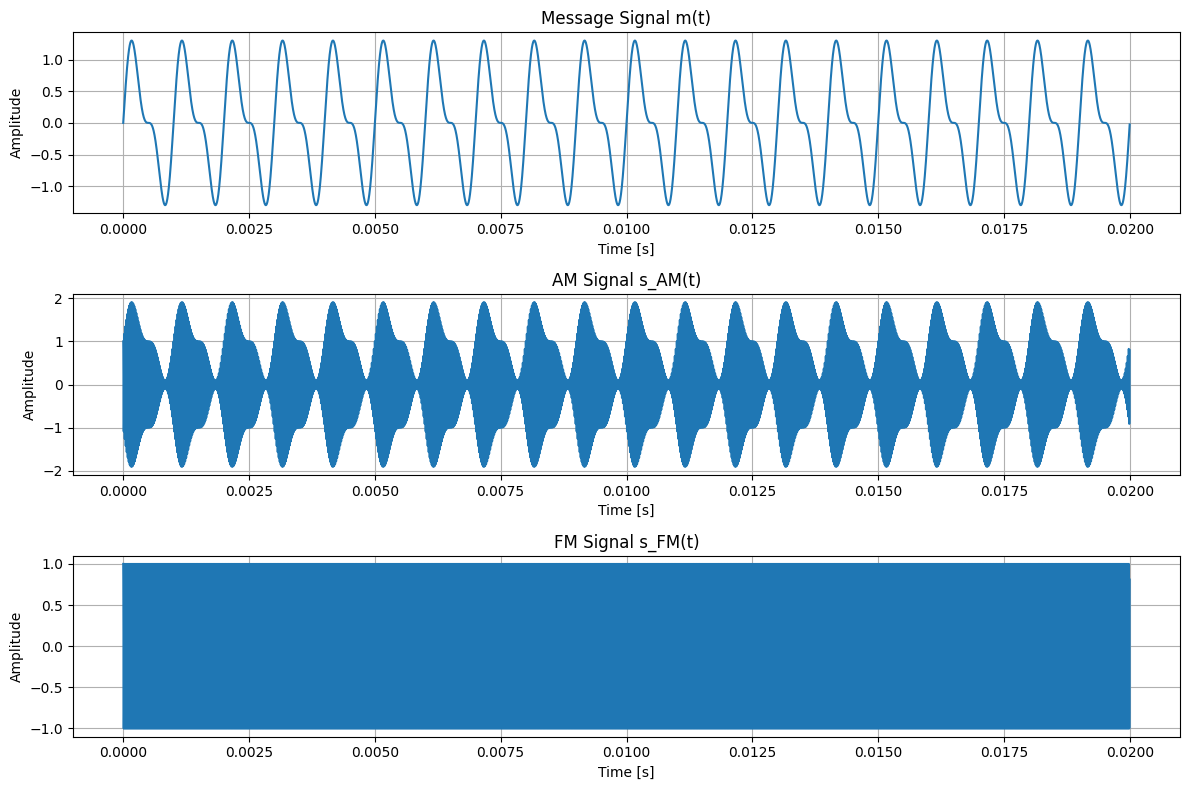

In [7]:
plt.figure(figsize=(12, 8))
plt.subplot(3,1,1)
plt.plot(t, m)
plt.title('Message Signal m(t)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.subplot(3,1,2)
plt.plot(t, s_am)
plt.title('AM Signal s_AM(t)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.subplot(3,1,3)
plt.plot(t, s_fm)
plt.title('FM Signal s_FM(t)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()

### 1.4

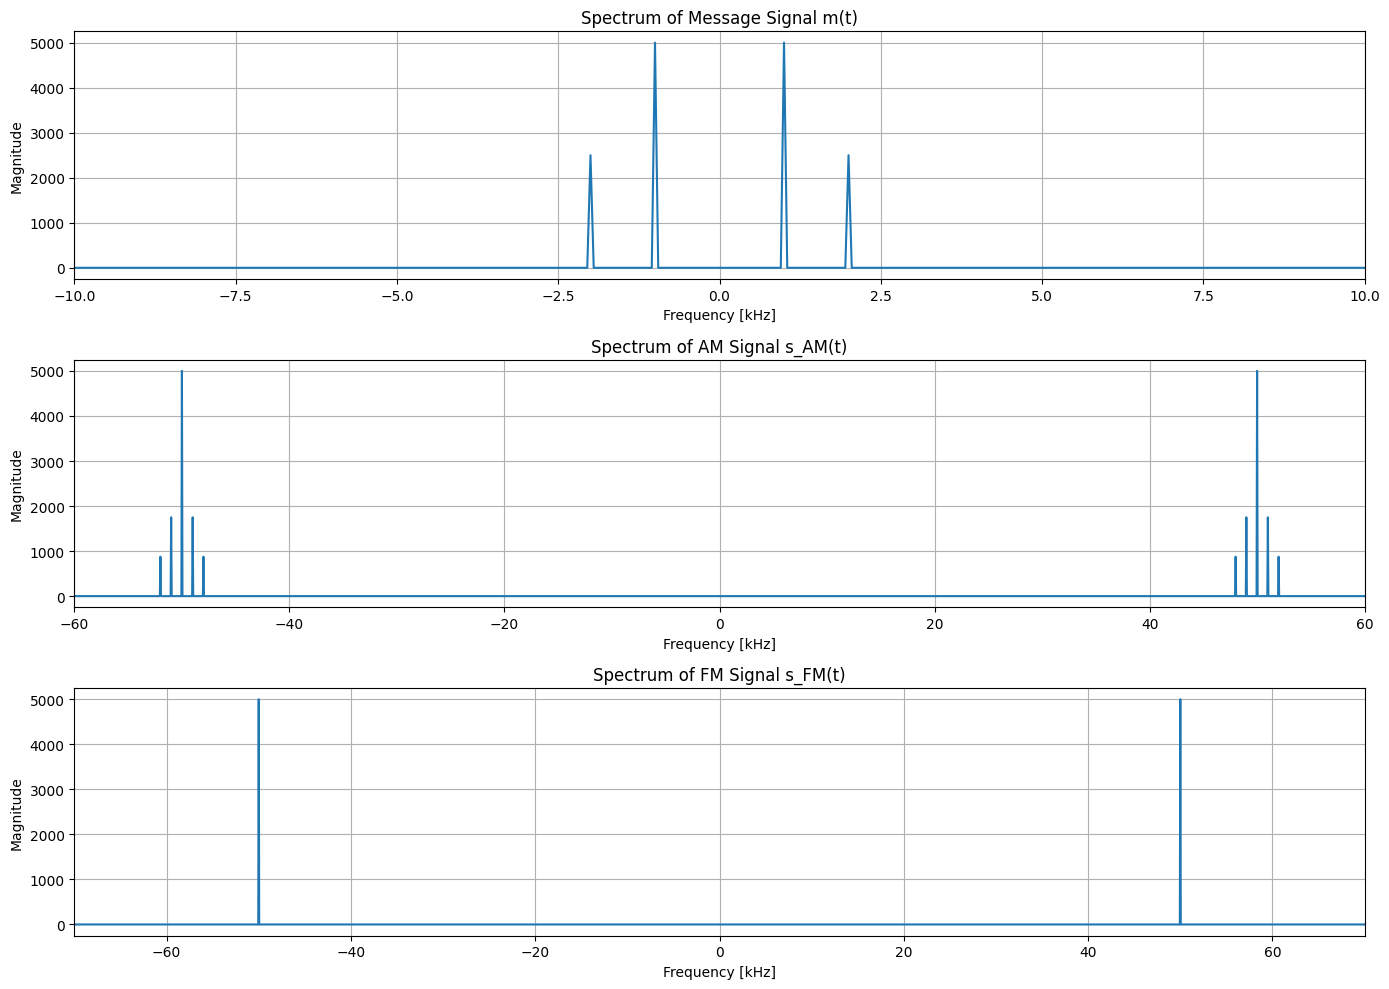

In [8]:
N = len(t)
freq = np.fft.fftshift(np.fft.fftfreq(N, 1/fs))

spectrum_m = np.abs(np.fft.fftshift(np.fft.fft(m)))
spectrum_s_am = np.abs(np.fft.fftshift(np.fft.fft(s_am)))
spectrum_s_fm = np.abs(np.fft.fftshift(np.fft.fft(s_fm)))

plt.figure(figsize=(14, 10))

plt.subplot(3,1,1)
plt.plot(freq/1000, spectrum_m)
plt.title('Spectrum of Message Signal m(t)')
plt.xlabel('Frequency [kHz]')
plt.ylabel('Magnitude')
plt.xlim([-10, 10])
plt.grid()

plt.subplot(3,1,2)
plt.plot(freq/1000, spectrum_s_am)
plt.title('Spectrum of AM Signal s_AM(t)')
plt.xlabel('Frequency [kHz]')
plt.ylabel('Magnitude')
plt.xlim([-60, 60])
plt.grid()

plt.subplot(3,1,3)
plt.plot(freq/1000, spectrum_s_fm)
plt.title('Spectrum of FM Signal s_FM(t)')
plt.xlabel('Frequency [kHz]')
plt.ylabel('Magnitude')
plt.xlim([-70, 70])
plt.grid()

plt.tight_layout()
plt.show()

## Завдання 2

### 2.1

In [9]:
res = np.cos(2*np.pi*f_c*t )

### 2.2 

In [10]:
res_am = s_am * res

In [11]:
spectrum_am = np.abs(np.fft.fftshift(np.fft.fft(res_am)))

C:\Users\basys\AppData\Local\Temp\ipykernel_14428\2194691122.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


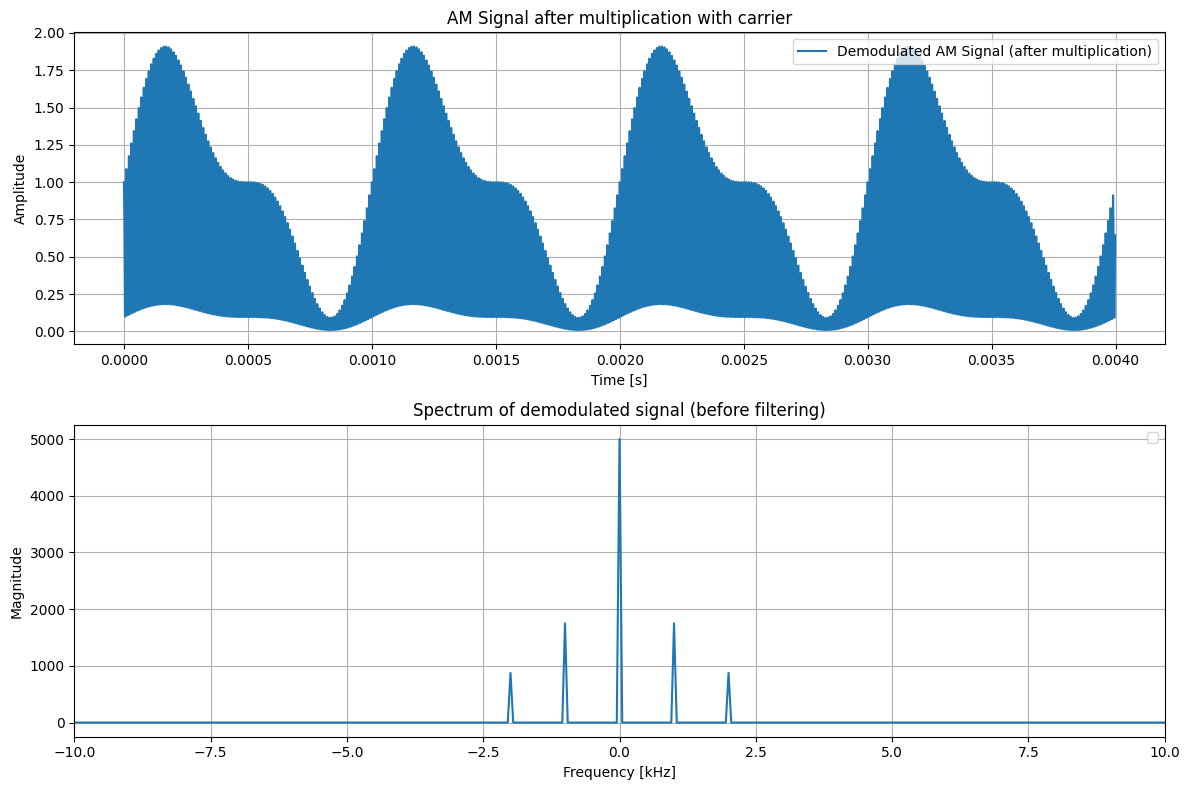

In [12]:
freq_res = np.fft.fftshift(np.fft.fftfreq(len(res_am), 1/fs))

plt.figure(figsize=(12, 8))

plt.subplot(2,1,1)
plt.plot(t[:2000], res_am[:2000], label='Demodulated AM Signal (after multiplication)')
plt.title('AM Signal after multiplication with carrier')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(freq_res/1000, spectrum_am)
plt.title('Spectrum of demodulated signal (before filtering)')
plt.xlabel('Frequency [kHz]')
plt.ylabel('Magnitude')
plt.xlim([-10, 10])
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

### 2.3

In [13]:
from scipy.signal import butter, filtfilt

order = 5
cutoff_freq = 3500
nyquist = fs / 2
normalized_cutoff = cutoff_freq / nyquist

b, a = butter(order, normalized_cutoff, btype='low', analog=False)

In [14]:
filtered_signal = filtfilt(b, a, res_am)
m_demodulated = filtered_signal - np.mean(filtered_signal)

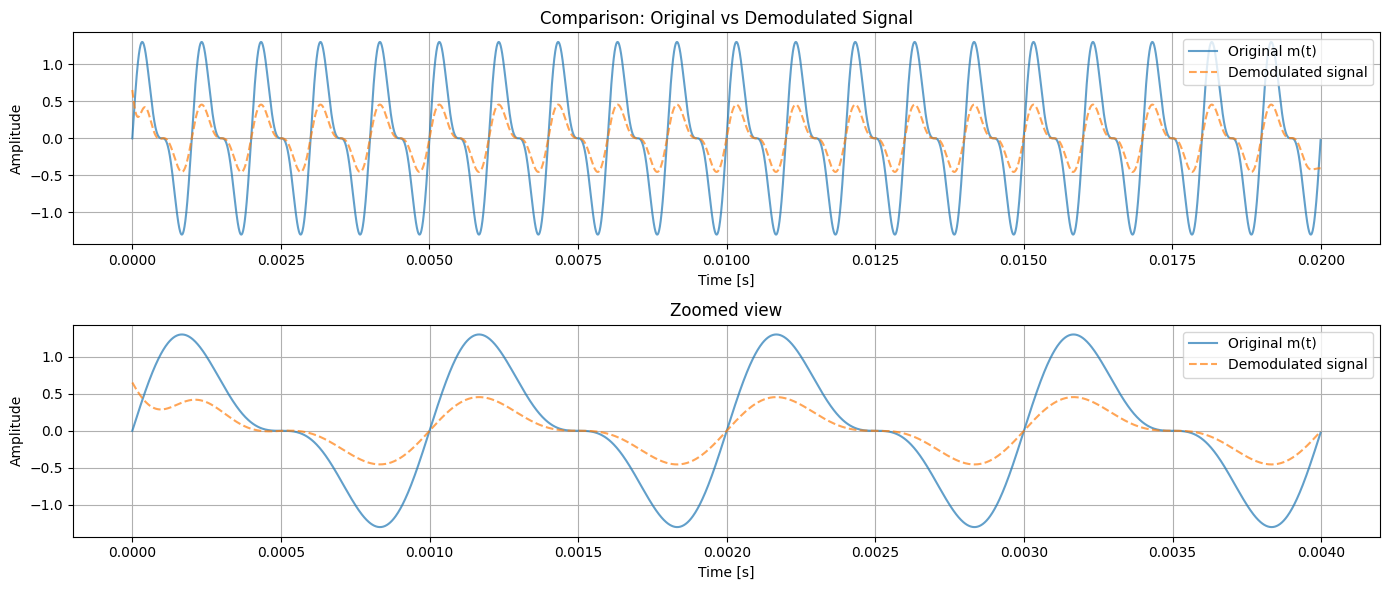

In [15]:
plt.figure(figsize=(14, 6))

plt.subplot(2,1,1)
plt.plot(t, m, label='Original m(t)', alpha=0.7)
plt.plot(t, m_demodulated, label='Demodulated signal', alpha=0.7, linestyle='--')
plt.title('Comparison: Original vs Demodulated Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(t[:2000], m[:2000], label='Original m(t)', alpha=0.7)
plt.plot(t[:2000], m_demodulated[:2000], label='Demodulated signal', alpha=0.7, linestyle='--')
plt.title('Zoomed view')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

### 2.4

In [16]:
mse = np.mean((m - m_demodulated)**2)
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.6f}")

Mean Squared Error (MSE): 0.264824
Root Mean Squared Error (RMSE): 0.514610


### 2.5*

In [ ]:
def add_awgn(signal, snr_db):
    power_signal = np.mean(np.abs(signal)**2)
    snr_linear = 10**(snr_db/10)
    power_noise = power_signal / snr_linear
    noise = np.sqrt(power_noise) * np.random.randn(len(signal))
    noisy_signal = signal + noise
    return noisy_signal

SNR = 20 dB: MSE = 0.265131


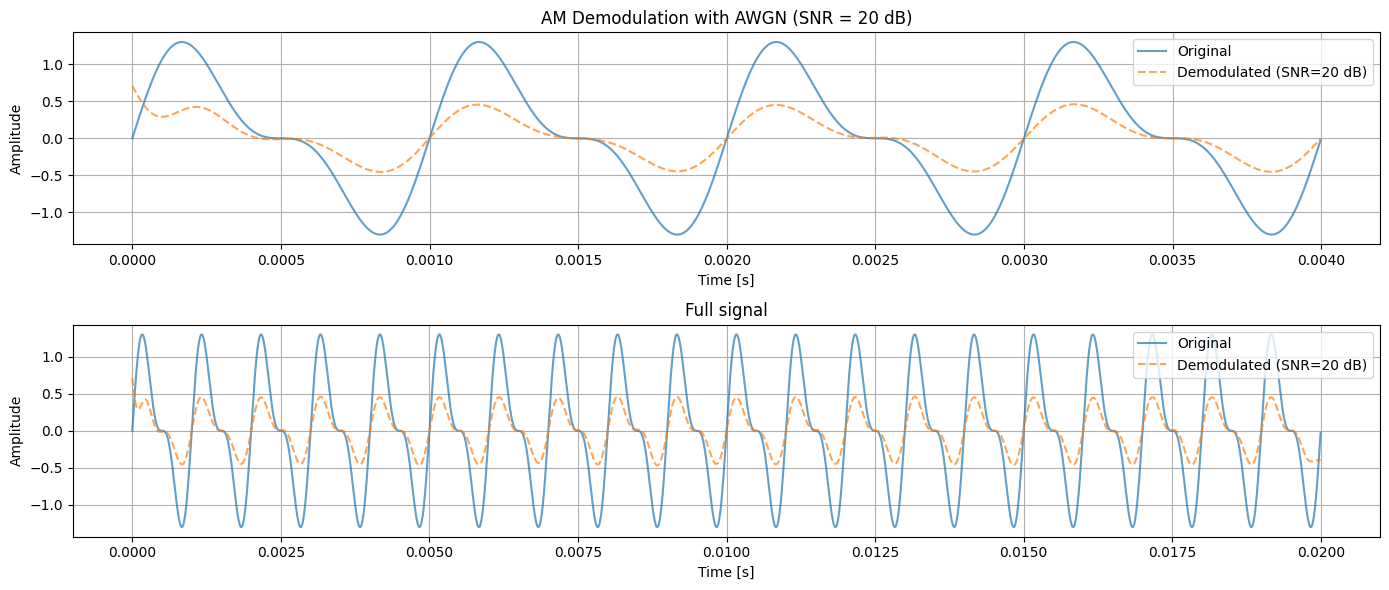

SNR = 10 dB: MSE = 0.260559


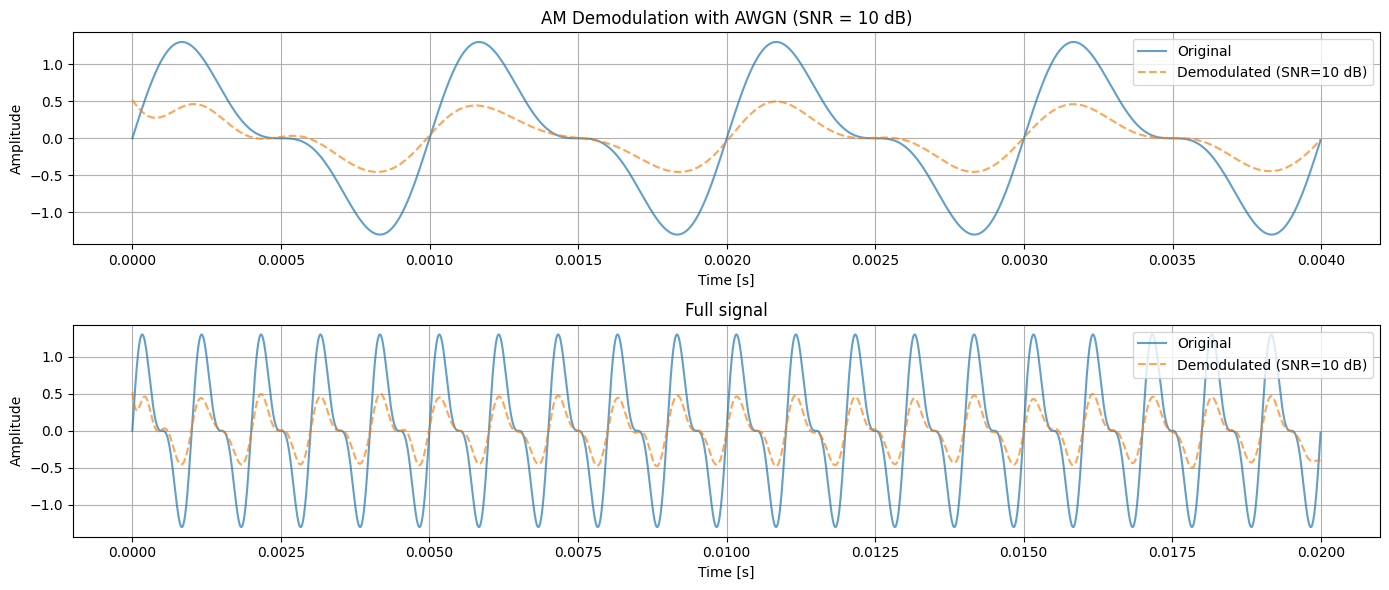

In [18]:
snr_values = [20, 10]

for snr_db in snr_values:
    s_am_noisy = add_awgn(s_am, snr_db)

    res_am_noisy = s_am_noisy * res
    m_demod_noisy = filtfilt(b, a, res_am_noisy)
    m_demod_noisy = m_demod_noisy - np.mean(m_demod_noisy)

    mse_noisy = np.mean((m - m_demod_noisy)**2)
    
    print(f"SNR = {snr_db} dB: MSE = {mse_noisy:.6f}")

    plt.figure(figsize=(14, 6))
    
    plt.subplot(2,1,1)
    plt.plot(t[:2000], m[:2000], label='Original', alpha=0.7)
    plt.plot(t[:2000], m_demod_noisy[:2000], label=f'Demodulated (SNR={snr_db} dB)', alpha=0.7, linestyle='--')
    plt.title(f'AM Demodulation with AWGN (SNR = {snr_db} dB)')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()
    
    plt.subplot(2,1,2)
    plt.plot(t, m, label='Original', alpha=0.7)
    plt.plot(t, m_demod_noisy, label=f'Demodulated (SNR={snr_db} dB)', alpha=0.7, linestyle='--')
    plt.title('Full signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()
    
    plt.tight_layout()
    plt.show()

SNR = 20 dB: MSE = 82043285.658653


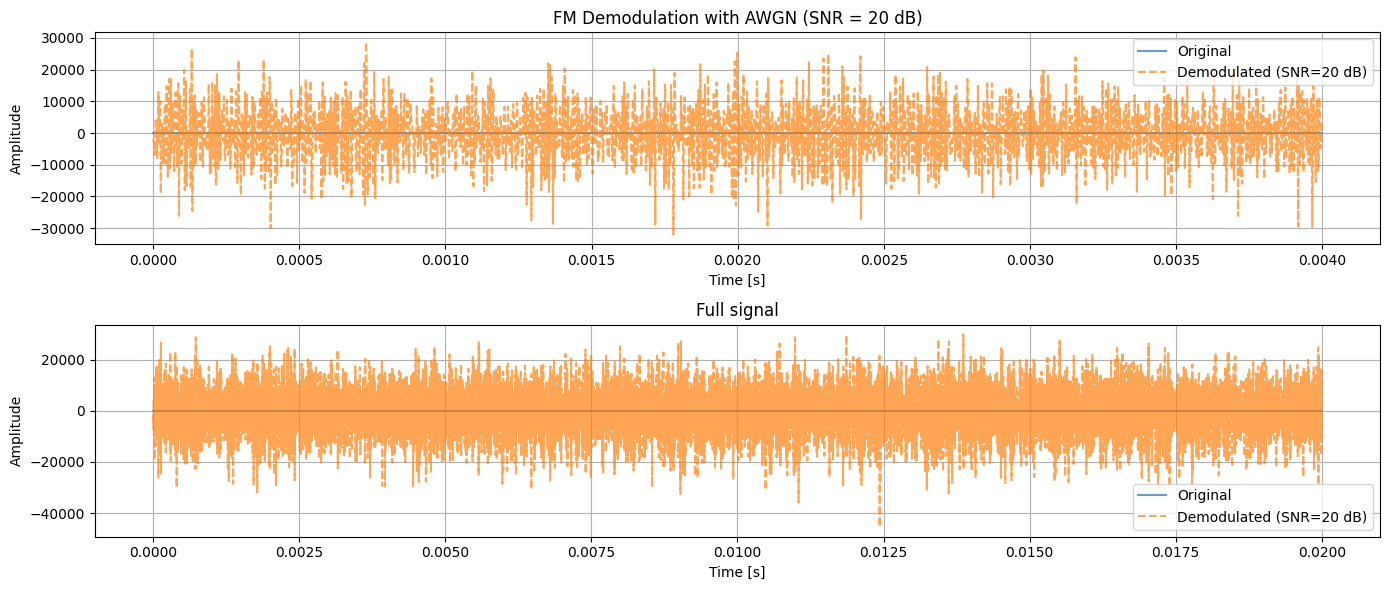

SNR = 10 dB: MSE = 857383757.712392


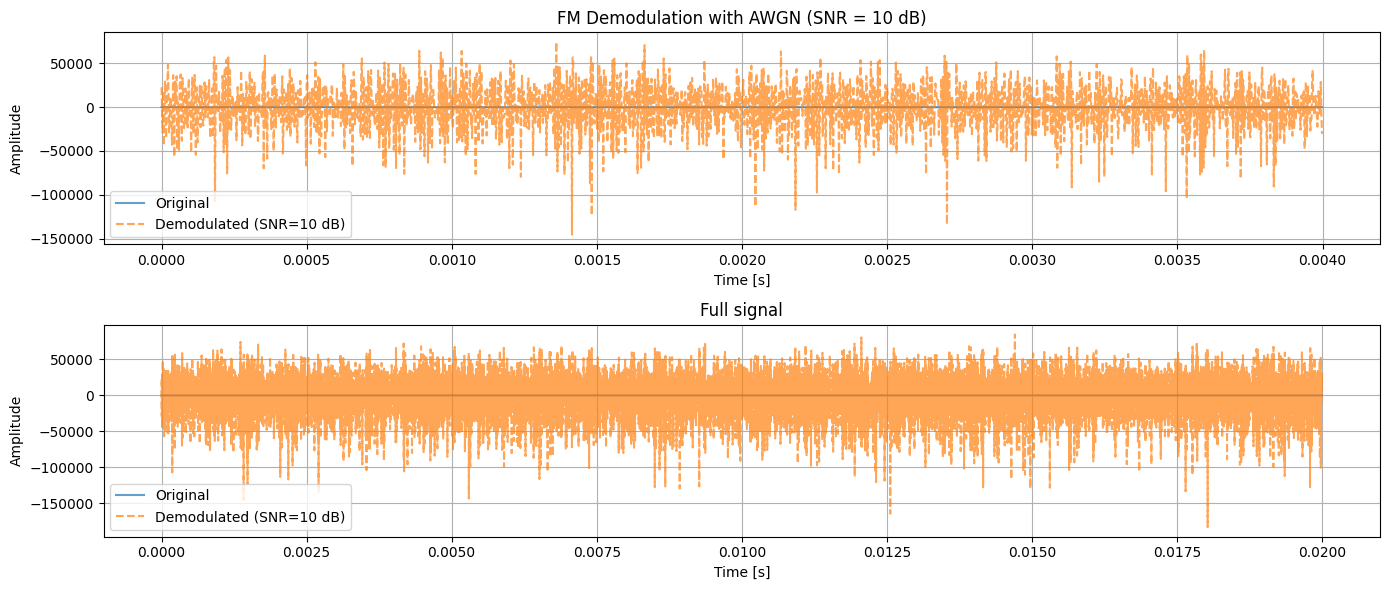

In [19]:
for snr_db in snr_values:
    s_fm_noisy = add_awgn(s_fm, snr_db)
    analytic_signal = hilbert(s_fm_noisy)
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))
    instantaneous_frequency = np.diff(instantaneous_phase) / (2.0*np.pi) * fs
    
    m_demod_fm = (instantaneous_frequency - f_c) / k_a
    m_demod_fm = np.append(m_demod_fm, m_demod_fm[-1])
    m_demod_fm = m_demod_fm - np.mean(m_demod_fm)

    mse_fm_noisy = np.mean((m - m_demod_fm)**2)
    
    print(f"SNR = {snr_db} dB: MSE = {mse_fm_noisy:.6f}")

    plt.figure(figsize=(14, 6))
    
    plt.subplot(2,1,1)
    plt.plot(t[:2000], m[:2000], label='Original', alpha=0.7)
    plt.plot(t[:2000], m_demod_fm[:2000], label=f'Demodulated (SNR={snr_db} dB)', alpha=0.7, linestyle='--')
    plt.title(f'FM Demodulation with AWGN (SNR = {snr_db} dB)')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()
    
    plt.subplot(2,1,2)
    plt.plot(t, m, label='Original', alpha=0.7)
    plt.plot(t, m_demod_fm, label=f'Demodulated (SNR={snr_db} dB)', alpha=0.7, linestyle='--')
    plt.title('Full signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()
    
    plt.tight_layout()
    plt.show()

## Завдання 3

### 3.1

In [ ]:
# Digital modulation parameters
np.random.seed(42)
num_bits = 2000
bits = np.random.randint(0, 2, num_bits)

fc_digital = 50_000
fs_digital = 500_000
bit_rate = 2000
bit_duration = 1 / bit_rate
samples_per_bit = int(fs_digital * bit_duration)

print(f"Number of bits: {num_bits}")
print(f"Bit rate: {bit_rate} bit/s")
print(f"Samples per bit: {samples_per_bit}")
print(f"First 20 bits: {bits[:20]}")

### 3.2